In [1]:
from svm import *
from hog_class import *
from functions import *
import time
from sklearn.metrics import accuracy_score

In [2]:
n_samples = 8000
link_cat = r'C:\Users\dolek\Documents\GitHub\Applied-Parallel-Programming\Main\Data\Cat\**'
link_dog = r'C:\Users\dolek\Documents\GitHub\Applied-Parallel-Programming\Main\Data\Dog\**'
cell_size = (8, 8)
block_size = (2, 2)
nbins = 9
threadsperblock = (32,32)
hog = HOG_CUDA_2(block_size, cell_size, nbins, 40,threadsperblock )

In [3]:
X_train, y_train, X_test, y_test = read_data(link_cat, link_dog, n_samples = n_samples, image_size = (128, 128))
start = time.time()
svm = SVM_Pa(kernel="rbf")
big_fit(X_train, y_train, hog, svm)
pred = big_predict(X_test, hog, svm)
end = time.time()
print("Time:", end-start)
print("Accuracy:", accuracy_score(pred, y_test))

C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 16 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 16 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 16 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\d

Time: 101.80567049980164
Accuracy: 0.7491666666666666


# Demo phân loại một số ảnh (không có trong data)

1 là class mèo, -1 là class chó

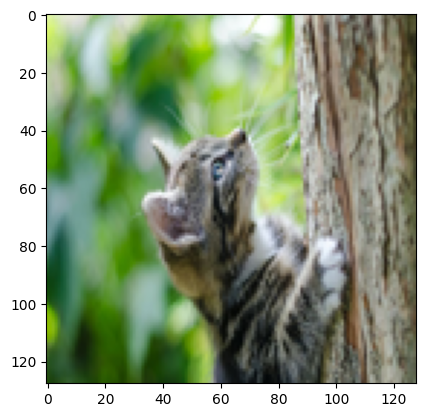

This is a CAT image



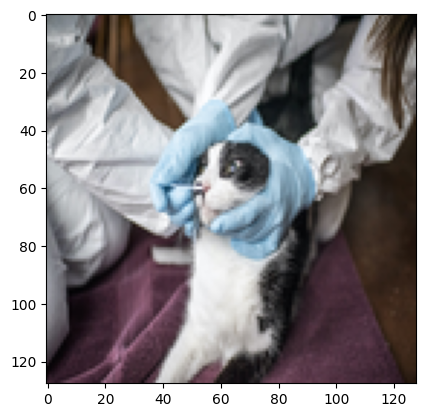

This is a CAT image



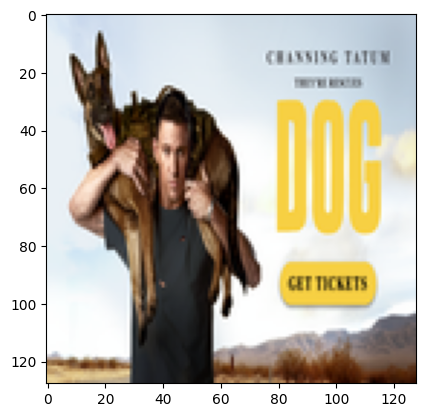

This is a DOG image



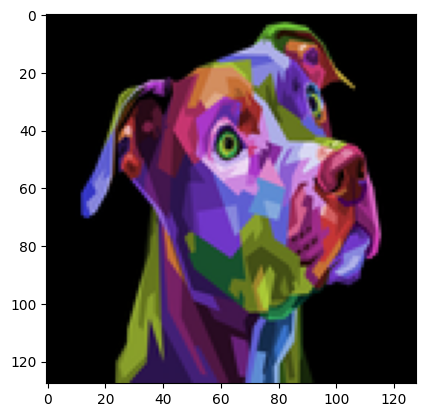

This is a DOG image



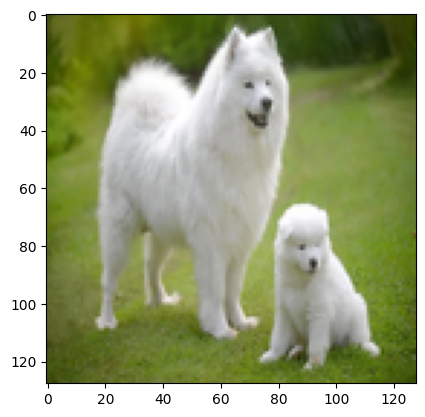

This is a DOG image



In [4]:
list_img = glob2.glob("./demo_images/**")
for i in list_img:
  img = Image.open(i).convert('RGB')
  img = img.resize((128, 128), Image.LANCZOS)
  img_pixel = np.array(img)
  plt.imshow(img_pixel)
  plt.show()
  if big_predict(np.array([img_pixel]), hog, svm)[0] == 1:
    print("This is a CAT image")
  else:
    print("This is a DOG image")
  print()